<a href="https://colab.research.google.com/github/bintangfikrif/Unnamed-Final_Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

### Subtask:
Load the "spatial-metrics-indonesia-remaining_forest_kabupaten.csv" file into a pandas DataFrame.


In [3]:
try:
    df = pd.read_csv('spatial-metrics-indonesia-remaining_forest_kabupaten.csv')
    display(df.head(10))
except FileNotFoundError:
    print("Error: File not found. Please ensure the file 'spatial-metrics-indonesia-remaining_forest_kabupaten.csv' exists in the current directory.")
    df = None # Assign None to df in case of error
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,natural_forest_area_hectares
0,2001,INDONESIA,ID,ACEH BARAT,ID-1107,ACEH,ID-11,215737.764000
1,2001,INDONESIA,ID,ACEH BARAT DAYA,ID-1112,ACEH,ID-11,220655.913176
2,2001,INDONESIA,ID,ACEH BESAR,ID-1108,ACEH,ID-11,251780.389059
3,2001,INDONESIA,ID,ACEH JAYA,ID-1116,ACEH,ID-11,50390.654471
4,2001,INDONESIA,ID,ACEH SELATAN,ID-1103,ACEH,ID-11,710227.314705
5,2001,INDONESIA,ID,ACEH SINGKIL,ID-1102,ACEH,ID-11,242695.767177
6,2001,INDONESIA,ID,ACEH TAMIANG,ID-1114,ACEH,ID-11,15691.762588
7,2001,INDONESIA,ID,ACEH TENGAH,ID-1106,ACEH,ID-11,394550.701765
8,2001,INDONESIA,ID,ACEH TENGGARA,ID-1104,ACEH,ID-11,435701.217881
9,2001,INDONESIA,ID,ACEH TIMUR,ID-1105,ACEH,ID-11,539882.881762


## Data Exploration

In [20]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Identify unique values and their frequencies for categorical columns
categorical_cols_to_explore = ['country', 'country_iso2', 'region', 'parent_region']

for col in categorical_cols_to_explore:
    # Add a check to ensure the column exists before trying to access it
    if col in df.columns:
        print(f"\nUnique values and counts for {col}:")
        print(df[col].value_counts())
    else:
        print(f"Column '{col}' not found in the DataFrame during exploration.")


# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


# Analyze relationships between numerical and categorical (example: forest area by region)
print("\nMean Forest Area by Region:\n", df.groupby('region')['natural_forest_area_hectares'].mean())

Shape of the DataFrame: (10758, 8)

Data types of each column:
 year                              int64
country                          object
country_iso2                     object
region                           object
region_trase_id                  object
parent_region                    object
parent_region_trase_id           object
natural_forest_area_hectares    float64
dtype: object

Descriptive statistics for numerical columns:
                year  natural_forest_area_hectares
count  10758.000000                  1.075800e+04
mean    2011.500000                  1.881335e+05
std        6.344584                  4.533565e+05
min     2001.000000                  0.000000e+00
25%     2006.000000                  3.843282e+01
50%     2011.500000                  1.264553e+04
75%     2017.000000                  1.335595e+05
max     2022.000000                  3.291772e+06

Unique values and counts for country:
country
INDONESIA    10758
Name: count, dtype: int64

Unique valu

### cek klengkapan wilayah

In [15]:
# Pastikan df tidak None sebelum melanjutkan
if df is not None:
    # Hapus duplikat
    initial_rows = len(df)
    df = df.drop_duplicates(subset=['year', 'region'])
    rows_after_dropping = len(df)
    print(f"Setelah hapus duplikat: {rows_after_dropping} baris")

    if initial_rows == rows_after_dropping:
        print("Tidak ada duplikat yang terhapus berdasarkan 'year' dan 'region'.")
    else:
        print(f"Jumlah duplikat yang terhapus: {initial_rows - rows_after_dropping} baris.")

    # Info dasar
    years = sorted(df['year'].unique())
    total_kabupaten = df['region'].nunique()

    print(f"Tahun: {years[0]} - {years[-1]} ({len(years)} tahun)")
    print(f"Total kabupaten unik: {total_kabupaten}")

    # Cek kelengkapan per tahun
    print(f"\nKELENGKAPAN PER TAHUN:")
    print("Tahun | Kabupaten | Status")
    print("-" * 25)

    incomplete_years = []
    for year in years:
        count = len(df[df['year'] == year])
        status = "Lengkap" if count == total_kabupaten else f"❌ Kurang {total_kabupaten - count}"
        print(f"{year} | {count:8} | {status}")

        if count != total_kabupaten:
            incomplete_years.append(year)

    # Summary
    complete_years = len(years) - len(incomplete_years)
    print(f"\n RINGKASAN:")
    print(f"• Tahun lengkap: {complete_years}/{len(years)}")
    print(f"• Tahun tidak lengkap: {len(incomplete_years)}")

    if incomplete_years:
        print(f"• Tahun bermasalah: {incomplete_years}")

        # Cek kabupaten yang sering hilang
        all_kabupaten = set(df['region'].unique())
        missing_freq = {}

        for year in incomplete_years:
            year_kabupaten = set(df[df['year'] == year]['region'].unique())
            missing = all_kabupaten - year_kabupaten

            for kab in missing:
                missing_freq[kab] = missing_freq.get(kab, 0) + 1

        # Tampilkan 5 yang paling sering hilang
        frequent_missing = sorted(missing_freq.items(), key=lambda x: x[1], reverse=True)[:5]

        if frequent_missing:
            print(f"\n🔍 KABUPATEN YANG SERING HILANG:")
            for kab, freq in frequent_missing:
                print(f"• {kab}: hilang di {freq} tahun")

    else:
        print(" Semua tahun lengkap!")

Setelah hapus duplikat: 10758 baris
Tidak ada duplikat yang terhapus berdasarkan 'year' dan 'region'.
Tahun: 2001 - 2022 (22 tahun)
Total kabupaten unik: 489

KELENGKAPAN PER TAHUN:
Tahun | Kabupaten | Status
-------------------------
2001 |      489 | Lengkap
2002 |      489 | Lengkap
2003 |      489 | Lengkap
2004 |      489 | Lengkap
2005 |      489 | Lengkap
2006 |      489 | Lengkap
2007 |      489 | Lengkap
2008 |      489 | Lengkap
2009 |      489 | Lengkap
2010 |      489 | Lengkap
2011 |      489 | Lengkap
2012 |      489 | Lengkap
2013 |      489 | Lengkap
2014 |      489 | Lengkap
2015 |      489 | Lengkap
2016 |      489 | Lengkap
2017 |      489 | Lengkap
2018 |      489 | Lengkap
2019 |      489 | Lengkap
2020 |      489 | Lengkap
2021 |      489 | Lengkap
2022 |      489 | Lengkap

 RINGKASAN:
• Tahun lengkap: 22/22
• Tahun tidak lengkap: 0
 Semua tahun lengkap!


### ngecek pesebaran nilai 0

Jumlah dan Persentase Nol: Apakah jumlah nilai 0 signifikan? Jika sangat kecil, mungkin itu memang kondisi aktual. Jika besar, perlu penyelidikan lebih lanjut.
Distribusi Tahun: Apakah nilai 0 tersebar merata di semua tahun, atau terkonsentrasi pada tahun-tahun tertentu? Konsentrasi di tahun-tahun awal atau akhir bisa menandakan isu dalam metode pengumpulan data pada periode tersebut.
Distribusi Wilayah: Apakah nilai 0 terkonsentrasi di wilayah tertentu? Jika ya, mungkin ada karakteristik spesifik wilayah tersebut atau masalah data yang terkait dengan wilayah tersebut.

Pola dalam Trend Per Wilayah: Lihat plot garis per wilayah sampel. Apakah ada penurunan bertahap menuju 0, atau penurunan mendadak? Penurunan mendadak dari nilai besar ke 0 tanpa data antara bisa jadi indikasi masalah data. Jika luasnya memang selalu 0 atau mendekati 0 di banyak tahun, mungkin wilayah tersebut memang tidak memiliki hutan alami tersisa atau tidak masuk dalam data.


===Analisis Nilai Nol pada 'natural_forest_area_hectares'===

Jumlah baris dengan luas lahan 0: 1914
Persentase baris dengan luas lahan 0: 17.79%

Tahun-tahun dengan nilai luas lahan 0:
year
2001    87
2002    87
2003    87
2004    87
2005    87
2006    87
2007    87
2008    87
2009    87
2010    87
2011    87
2012    87
2013    87
2014    87
2015    87
2016    87
2017    87
2018    87
2019    87
2020    87
2021    87
2022    87
Name: count, dtype: int64

Wilayah (region) dengan nilai luas lahan 0 terbanyak:
region
ALOR                     22
BANDA ACEH (KOTA)        22
BANDAR LAMPUNG (KOTA)    22
BANDUNG BARAT            22
BANDUNG (KOTA)           22
BANJAR (KOTA)            22
BANJARMASIN (KOTA)       22
BANTUL                   22
BEKASI                   22
BEKASI (KOTA)            22
Name: count, dtype: int64

Parent Region dengan nilai luas lahan 0 terbanyak:
parent_region
JAWA TENGAH            330
JAWA BARAT             242
JAWA TIMUR             176
LAMPUNG                11

,year,natural_forest_area_hectares
12,2001,0.0
501,2002,0.0
990,2003,0.0
1479,2004,0.0
1968,2005,0.0
2457,2006,0.0
2946,2007,0.0
3435,2008,0.0
3924,2009,0.0
4413,2010,0.0


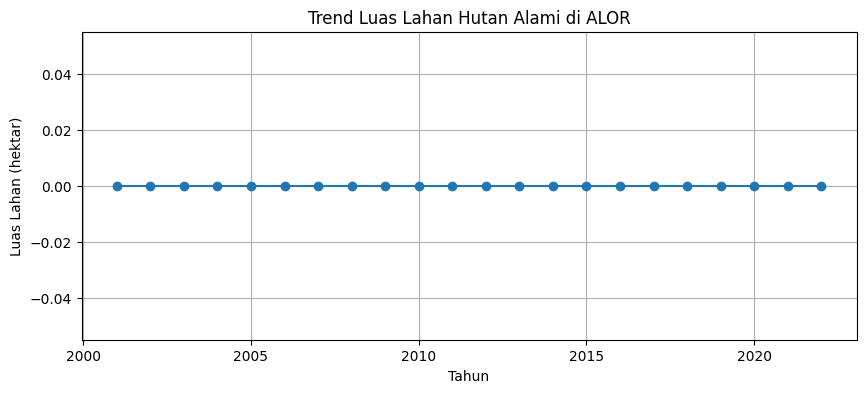


Data Luas Lahan untuk Wilayah: BANDA ACEH (KOTA)


,year,natural_forest_area_hectares
19,2001,0.0
508,2002,0.0
997,2003,0.0
1486,2004,0.0
1975,2005,0.0
2464,2006,0.0
2953,2007,0.0
3442,2008,0.0
3931,2009,0.0
4420,2010,0.0


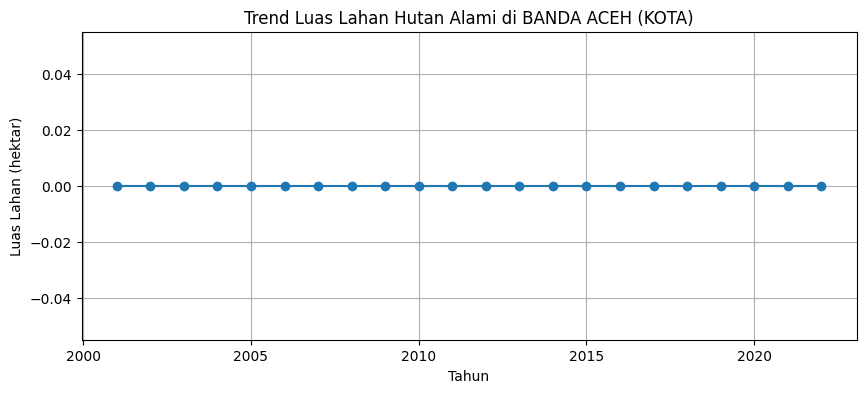


Data Luas Lahan untuk Wilayah: BANDAR LAMPUNG (KOTA)


,year,natural_forest_area_hectares
20,2001,0.0
509,2002,0.0
998,2003,0.0
1487,2004,0.0
1976,2005,0.0
2465,2006,0.0
2954,2007,0.0
3443,2008,0.0
3932,2009,0.0
4421,2010,0.0


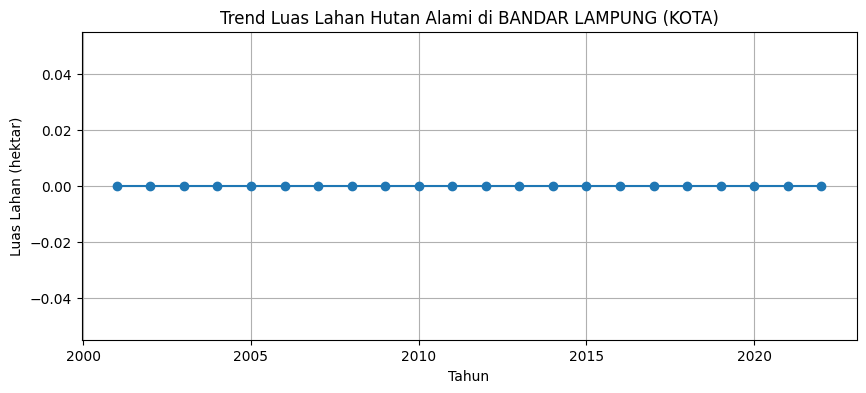


Perbandingan Statistik Deskriptif (dengan dan tanpa nilai 0)

Statistik Deskriptif (Termasuk Nilai 0):


,natural_forest_area_hectares
count,1.075800e+04
mean,1.881335e+05
std,4.533565e+05
min,0.000000e+00
25%,3.843282e+01
50%,1.264553e+04
75%,1.335595e+05
max,3.291772e+06



Statistik Deskriptif (Mengecualikan Nilai 0):


,natural_forest_area_hectares
count,8.844000e+03
mean,2.288490e+05
std,4.906110e+05
min,1.817647e-01
25%,2.328184e+03
50%,3.630564e+04
75%,1.977534e+05
max,3.291772e+06


In [26]:
# Analisis Nilai Nol pada 'natural_forest_area_hectares'

# 1. Melihat persebaran nilai 0
print("\n===Analisis Nilai Nol pada 'natural_forest_area_hectares'===")

# Jumlah total baris dengan nilai 0 pada kolom luas lahan
count_zero_area = len(df[df['natural_forest_area_hectares'] == 0])
print(f"\nJumlah baris dengan luas lahan 0: {count_zero_area}")
print(f"Persentase baris dengan luas lahan 0: {(count_zero_area / len(df)) * 100:.2f}%")

# Melihat tahun-tahun di mana nilai 0 muncul
print("\nTahun-tahun dengan nilai luas lahan 0:")
print(df[df['natural_forest_area_hectares'] == 0]['year'].value_counts().sort_index())

# Melihat wilayah (region) di mana nilai 0 muncul paling sering
print("\nWilayah (region) dengan nilai luas lahan 0 terbanyak:")
print(df[df['natural_forest_area_hectares'] == 0]['region'].value_counts().head(10)) # Tampilkan 10 terbanyak

# Melihat parent region di mana nilai 0 muncul paling sering
print("\nParent Region dengan nilai luas lahan 0 terbanyak:")
print(df[df['natural_forest_area_hectares'] == 0]['parent_region'].value_counts().head(10)) # Tampilkan 10 terbanyak

# 2. Membandingkan dengan nilai lain (analisis per wilayah dari waktu ke waktu)
print("\n### Analisis Perubahan Luas Lahan dari Waktu ke Waktu di Wilayah dengan Nilai Nol ###")

# Ambil contoh wilayah yang memiliki nilai 0
regions_with_zero = df[df['natural_forest_area_hectares'] == 0]['region'].unique()

# Ambil beberapa contoh wilayah (misal 5 wilayah pertama) untuk dilihat detailnya
sample_regions_to_plot = regions_with_zero[:3]

for region in sample_regions_to_plot:
    print(f"\nData Luas Lahan untuk Wilayah: {region}")
    region_data = df[df['region'] == region].sort_values('year')
    display(region_data[['year', 'natural_forest_area_hectares']])

    # Visualisasi trend luas lahan per wilayah sampel
    plt.figure(figsize=(10, 4))
    plt.plot(region_data['year'], region_data['natural_forest_area_hectares'], marker='o')
    plt.title(f"Trend Luas Lahan Hutan Alami di {region}")
    plt.xlabel("Tahun")
    plt.ylabel("Luas Lahan (hektar)")
    plt.grid(True)
    plt.show()


# 3. Melihat data deskriptif (membandingkan dengan/tanpa nilai 0)
print("\nPerbandingan Statistik Deskriptif (dengan dan tanpa nilai 0)")

print("\nStatistik Deskriptif (Termasuk Nilai 0):")
display(df['natural_forest_area_hectares'].describe())

print("\nStatistik Deskriptif (Mengecualikan Nilai 0):")
# Filter DataFrame untuk mengecualikan baris dengan nilai 0 di kolom luas lahan
df_no_zero_area = df[df['natural_forest_area_hectares'] > 0]
display(df_no_zero_area['natural_forest_area_hectares'].describe())


Correlation matrix for numerical columns:
                                   year  natural_forest_area_hectares
year                          1.000000                     -0.015594
natural_forest_area_hectares -0.015594                      1.000000


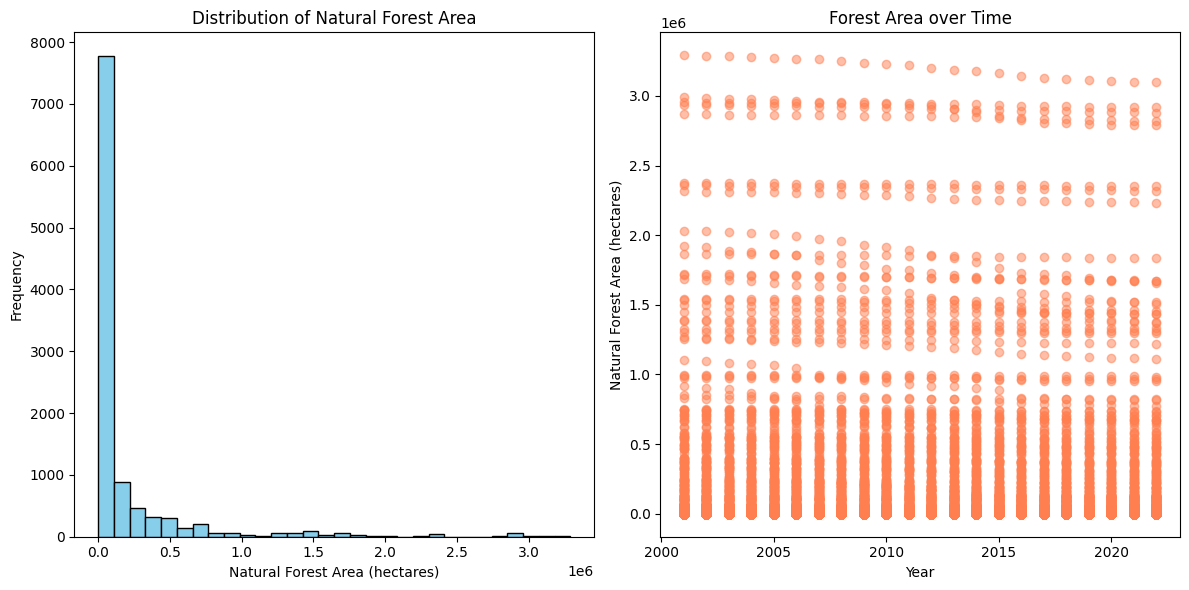

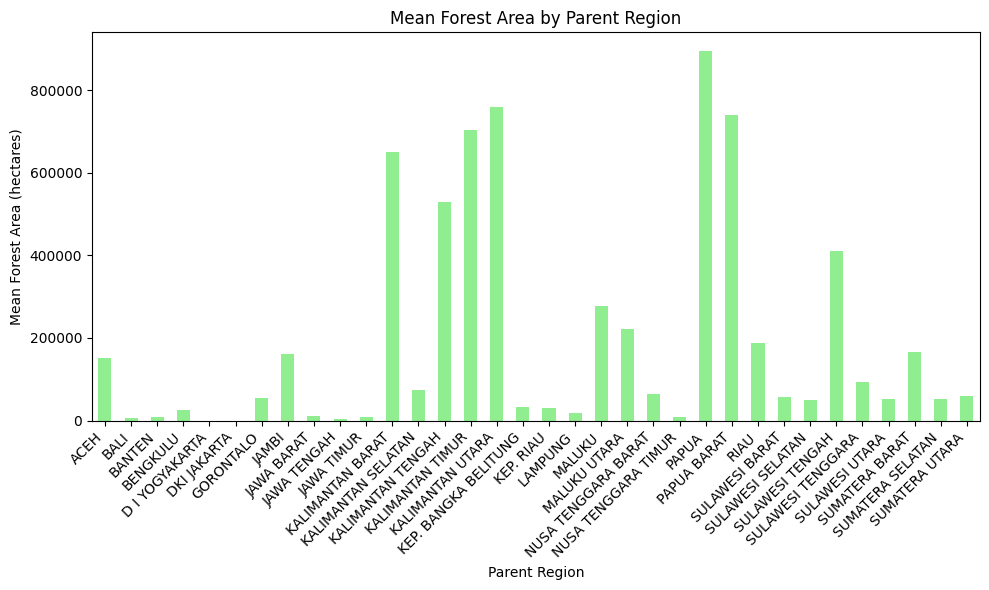

In [16]:
# Recalculate the correlation matrix for numerical columns only
numerical_cols = ['year', 'natural_forest_area_hectares']
print("\nCorrelation matrix for numerical columns:\n", df[numerical_cols].corr())

# Visualizations
plt.figure(figsize=(12, 6))

# Histogram of forest area
plt.subplot(1, 2, 1)
plt.hist(df['natural_forest_area_hectares'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Natural Forest Area (hectares)')
plt.ylabel('Frequency')
plt.title('Distribution of Natural Forest Area')

# Scatter plot of forest area vs. year
plt.subplot(1, 2, 2)
plt.scatter(df['year'], df['natural_forest_area_hectares'], color='coral', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Natural Forest Area (hectares)')
plt.title('Forest Area over Time')

plt.tight_layout()
plt.show()


#Further analysis (example: forest area by region)
plt.figure(figsize=(10, 6))
region_means = df.groupby('parent_region')['natural_forest_area_hectares'].mean()
region_means.plot(kind='bar', color='lightgreen')
plt.xlabel('Parent Region')
plt.ylabel('Mean Forest Area (hectares)')
plt.title('Mean Forest Area by Parent Region')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Create visualizations to further explore the data, focusing on relationships and distributions.


**Reasoning**:
Create visualizations as instructed, including histograms, box plots, bar charts, scatter plots, and a correlation matrix heatmap, to explore the data further.  Focus on the distributions and relationships of the features, especially 'natural_forest_area_hectares'.



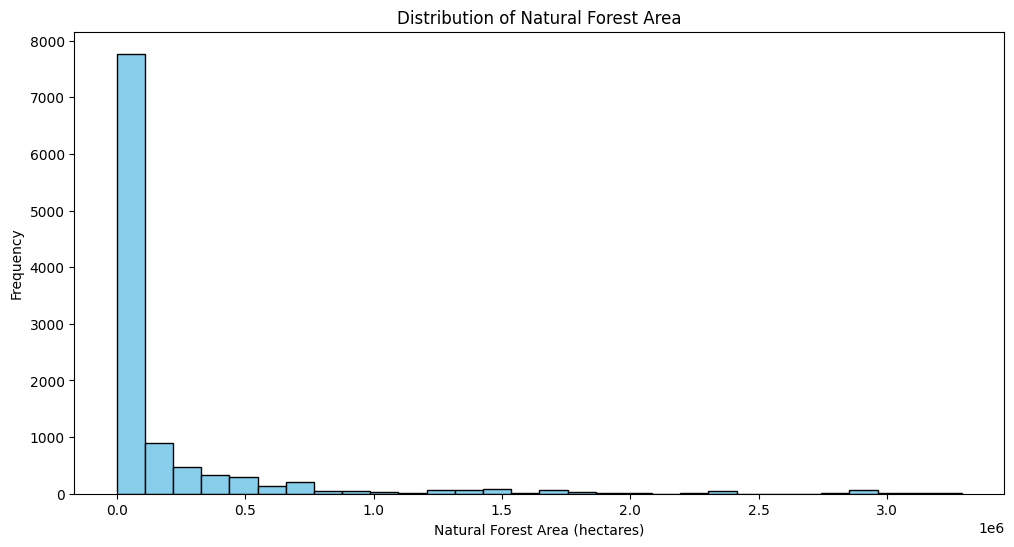

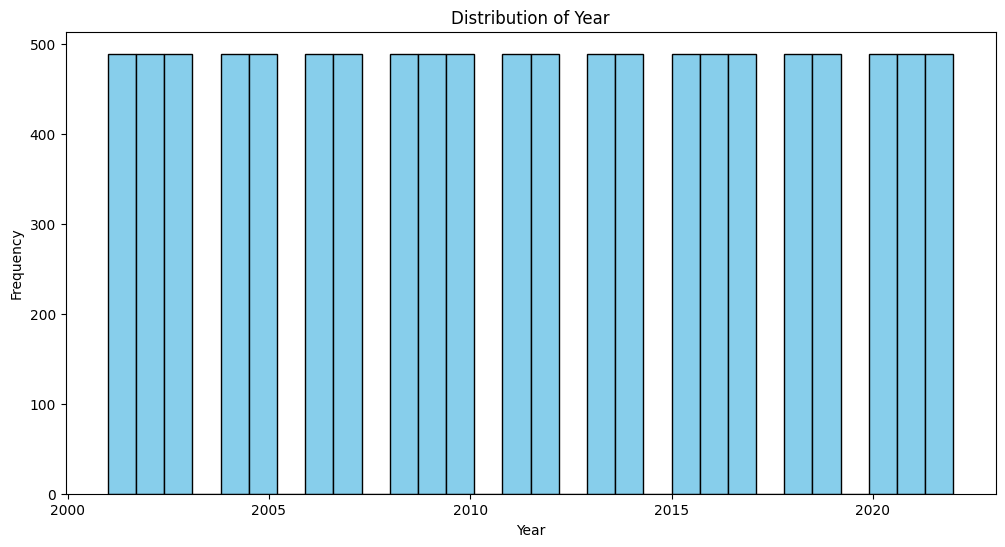

<ipython-input-4-36fe2d5f6bac>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['natural_forest_area_hectares']], labels=['Natural Forest Area'])


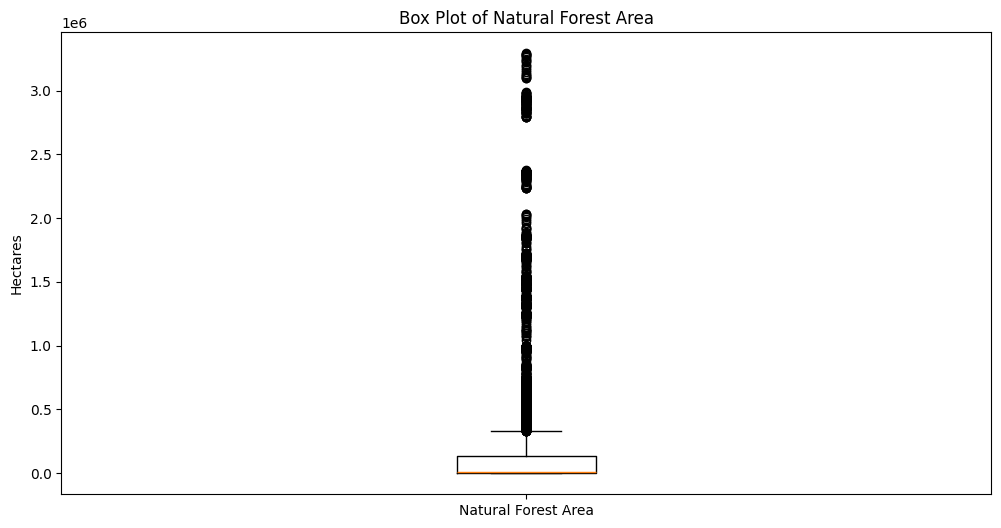

<ipython-input-4-36fe2d5f6bac>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['year']], labels=['Year'])


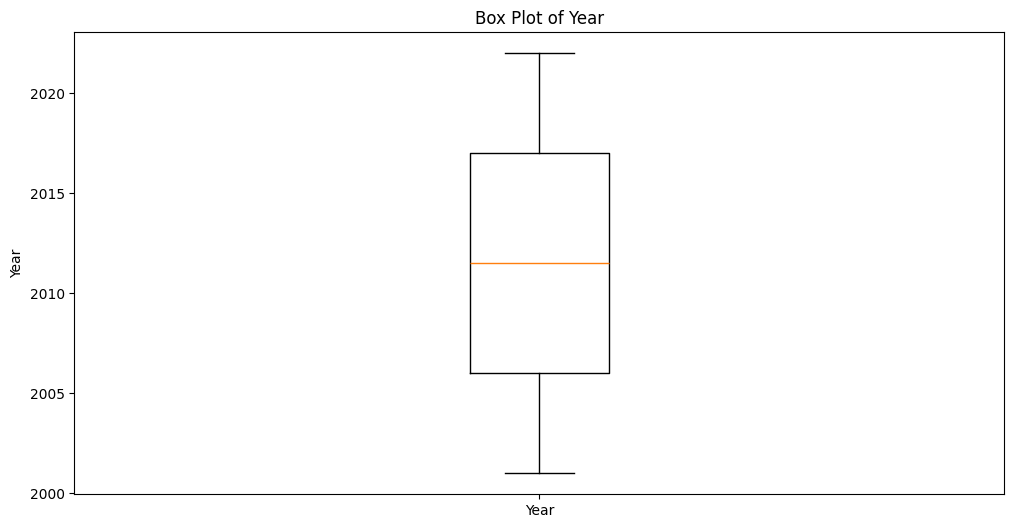

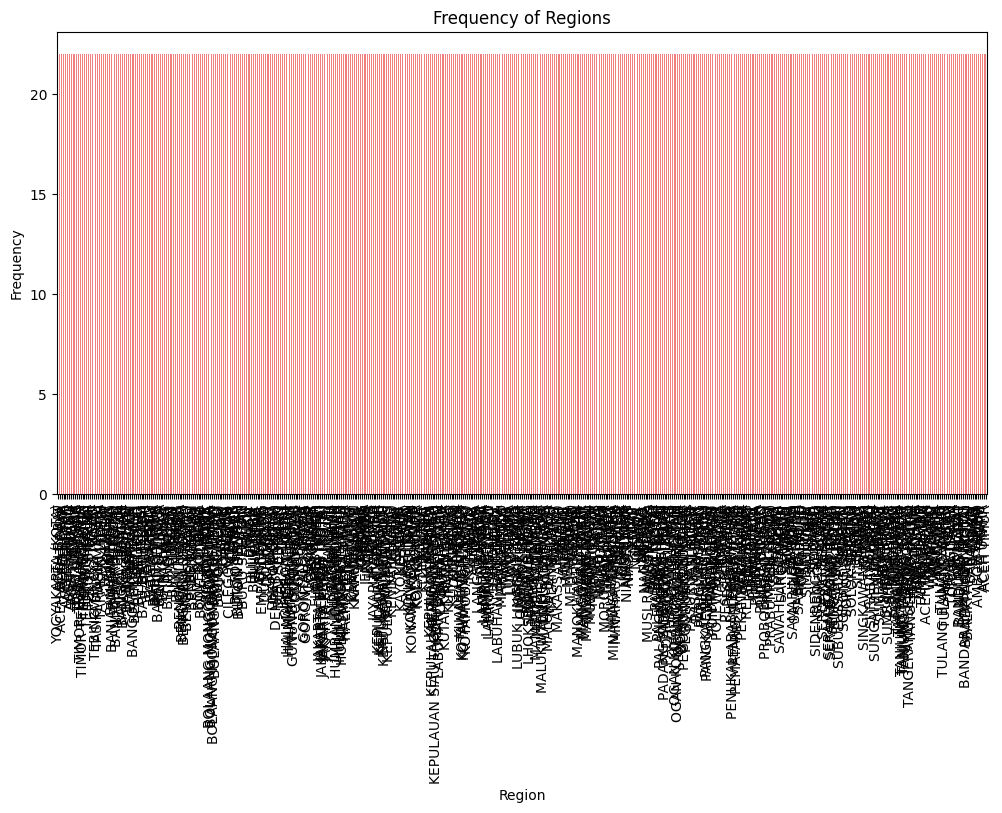

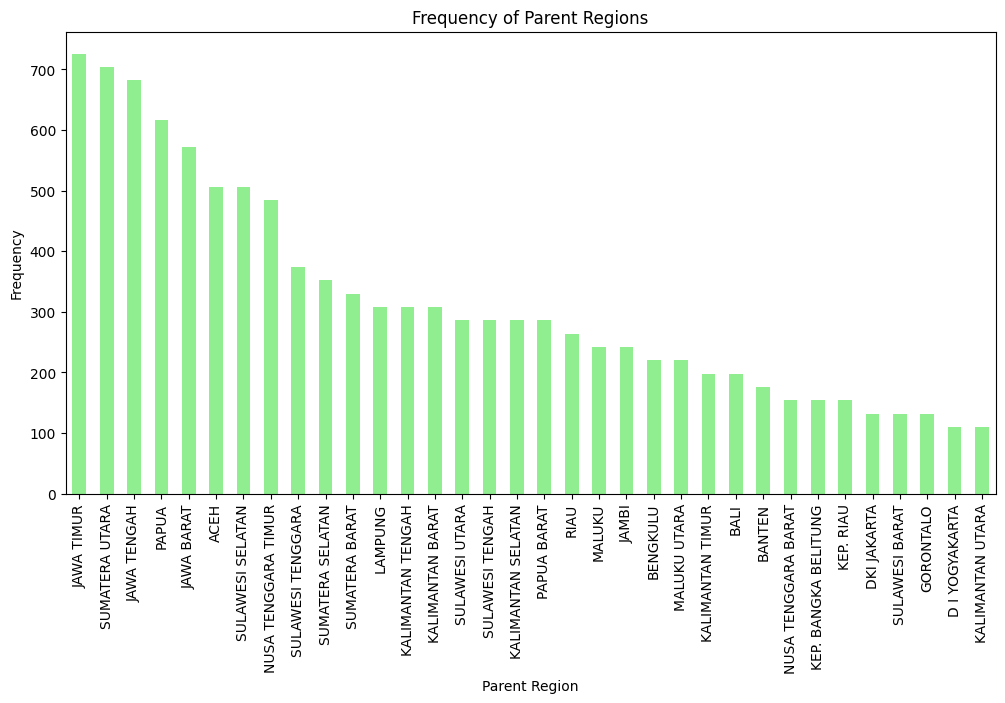

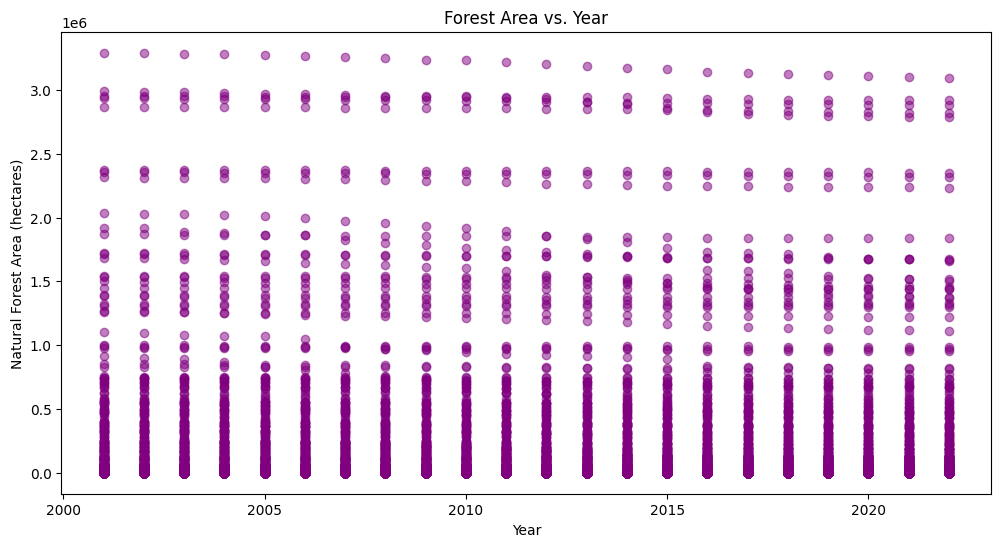

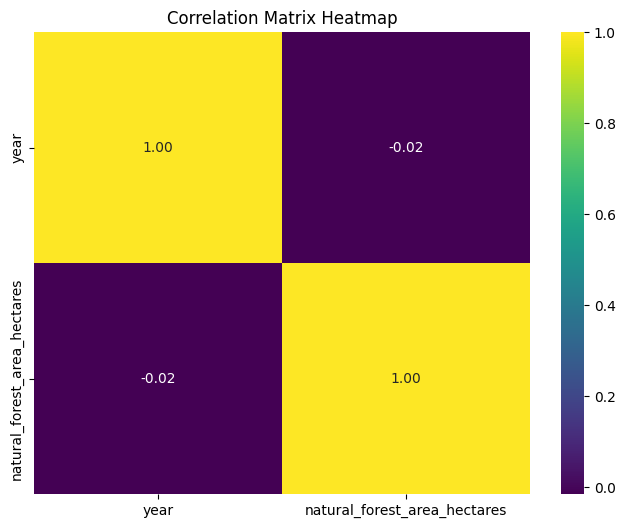

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(12, 6))
plt.hist(df['natural_forest_area_hectares'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Natural Forest Area (hectares)')
plt.ylabel('Frequency')
plt.title('Distribution of Natural Forest Area')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['year'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')
plt.show()


# Box Plots for Numerical Features
plt.figure(figsize=(12, 6))
plt.boxplot([df['natural_forest_area_hectares']], labels=['Natural Forest Area'])
plt.ylabel('Hectares')
plt.title('Box Plot of Natural Forest Area')
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([df['year']], labels=['Year'])
plt.ylabel('Year')
plt.title('Box Plot of Year')
plt.show()

# Bar Charts for Categorical Features
plt.figure(figsize=(12, 6))
df['region'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Regions')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
df['parent_region'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Parent Region')
plt.ylabel('Frequency')
plt.title('Frequency of Parent Regions')
plt.xticks(rotation=90)
plt.show()

# Scatter Plots for Numerical Features
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['natural_forest_area_hectares'], color='purple', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Natural Forest Area (hectares)')
plt.title('Forest Area vs. Year')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['year', 'natural_forest_area_hectares']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Reasoning**:
The previous code block generated some visualizations, but there were warnings about deprecated arguments.  The generated figures were also not displayed correctly. I will fix the warnings and try to display the plots again.  I will also add more informative titles and labels to the plots.



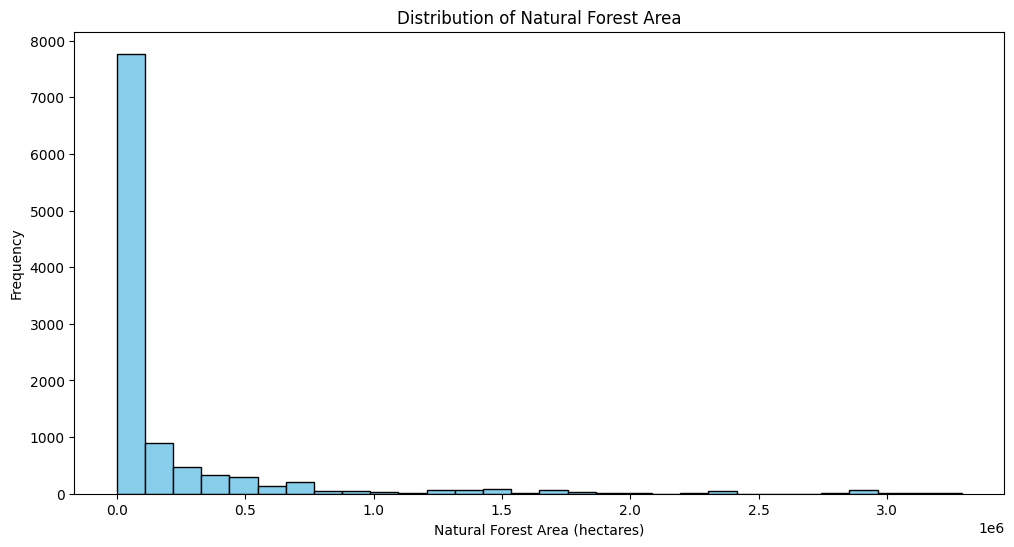

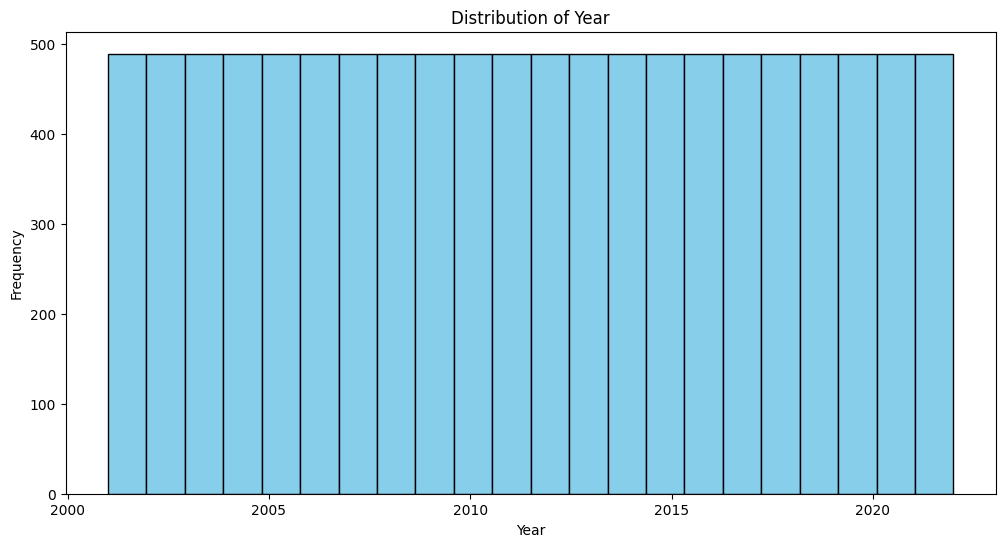

<ipython-input-5-dbe83883275e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['natural_forest_area_hectares']], labels=['Natural Forest Area'], showfliers=False) # Remove outliers for better visualization


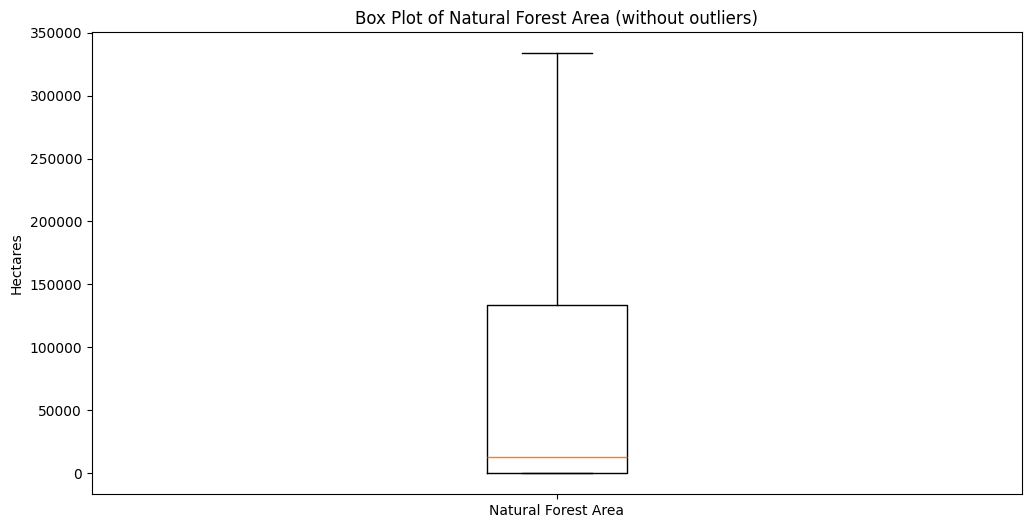

<ipython-input-5-dbe83883275e>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['year']], labels=['Year'], showfliers=False)


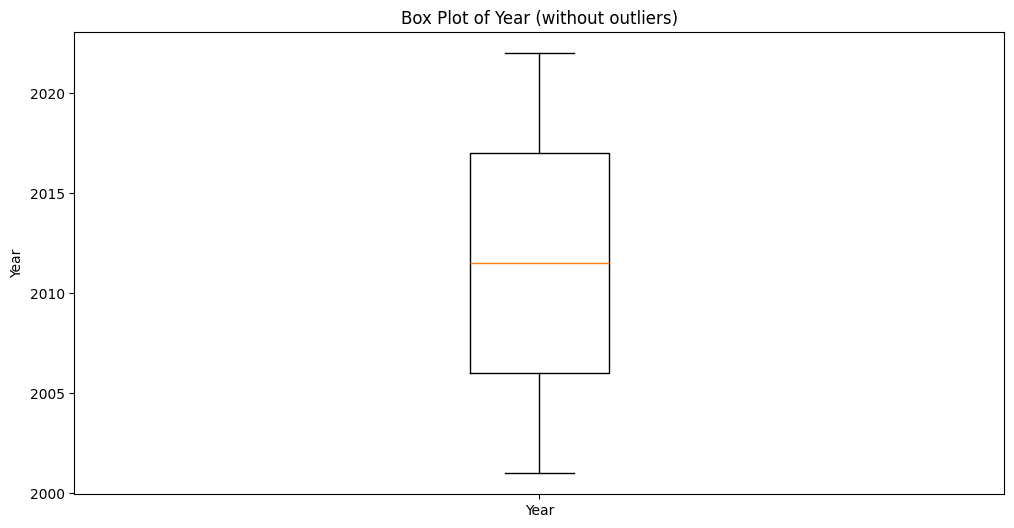

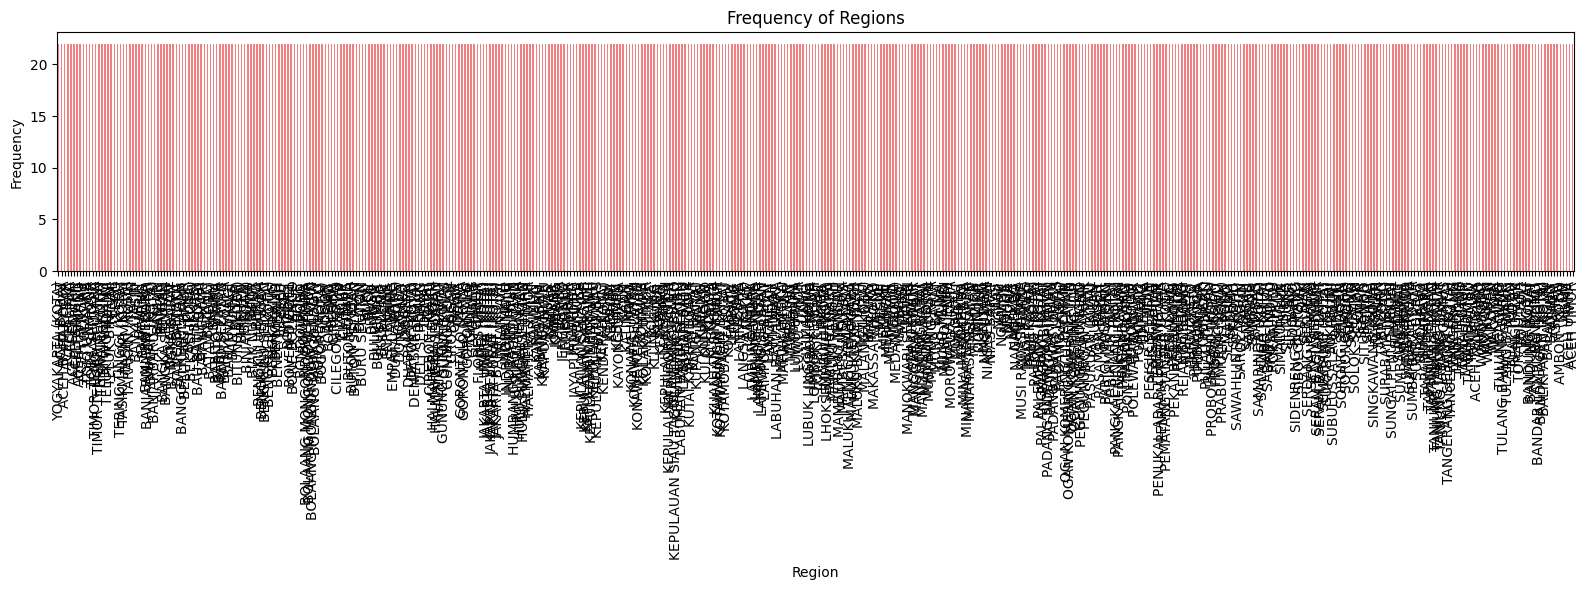

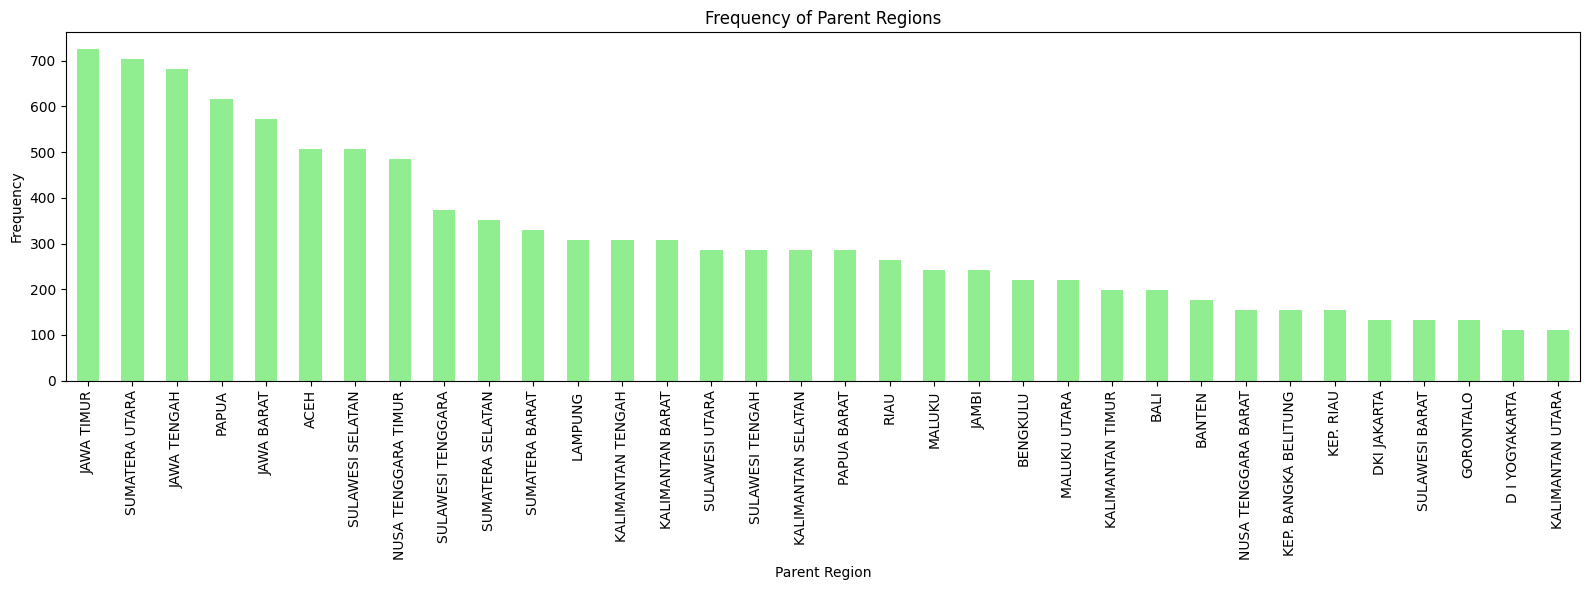

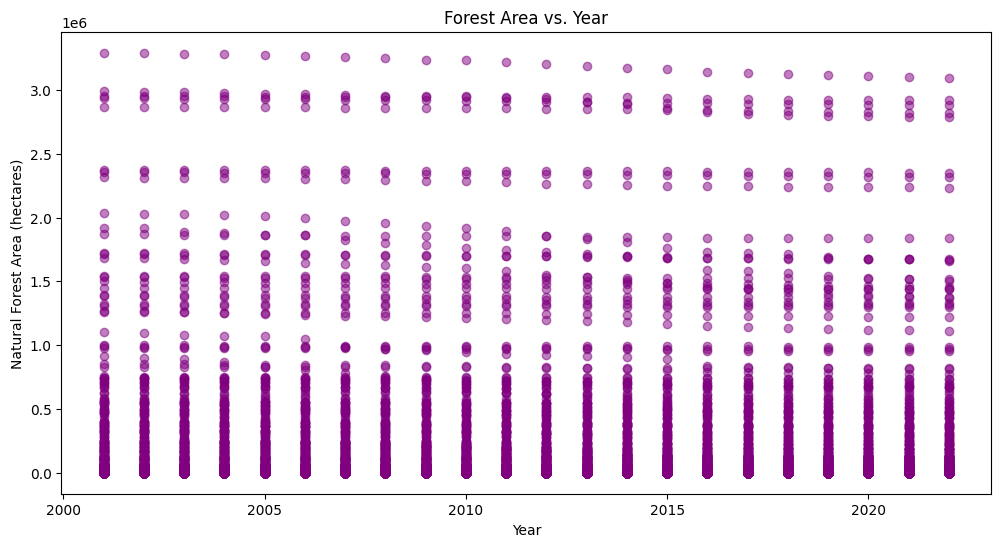

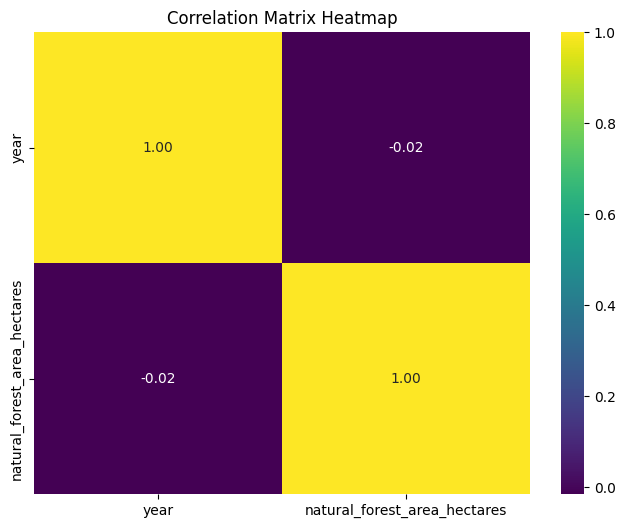

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(12, 6))
plt.hist(df['natural_forest_area_hectares'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Natural Forest Area (hectares)')
plt.ylabel('Frequency')
plt.title('Distribution of Natural Forest Area')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['year'], bins=len(df['year'].unique()), color='skyblue', edgecolor='black') # Use unique years for bins
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')
plt.show()


# Box Plots for Numerical Features
plt.figure(figsize=(12, 6))
plt.boxplot([df['natural_forest_area_hectares']], labels=['Natural Forest Area'], showfliers=False) # Remove outliers for better visualization
plt.ylabel('Hectares')
plt.title('Box Plot of Natural Forest Area (without outliers)')
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([df['year']], labels=['Year'], showfliers=False)
plt.ylabel('Year')
plt.title('Box Plot of Year (without outliers)')
plt.show()

# Bar Charts for Categorical Features
plt.figure(figsize=(16, 6)) # Increased figure size
df['region'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Regions')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

plt.figure(figsize=(16, 6)) # Increased figure size
df['parent_region'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Parent Region')
plt.ylabel('Frequency')
plt.title('Frequency of Parent Regions')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# Scatter Plots for Numerical Features
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['natural_forest_area_hectares'], color='purple', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Natural Forest Area (hectares)')
plt.title('Forest Area vs. Year')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['year', 'natural_forest_area_hectares']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Reasoning**:
The previous attempts to generate visualizations still resulted in warnings. I will fix the warnings by renaming the `labels` parameter to `tick_labels` in the `boxplot` function calls.  I will also try to make the plots more informative by adding titles and axis labels.



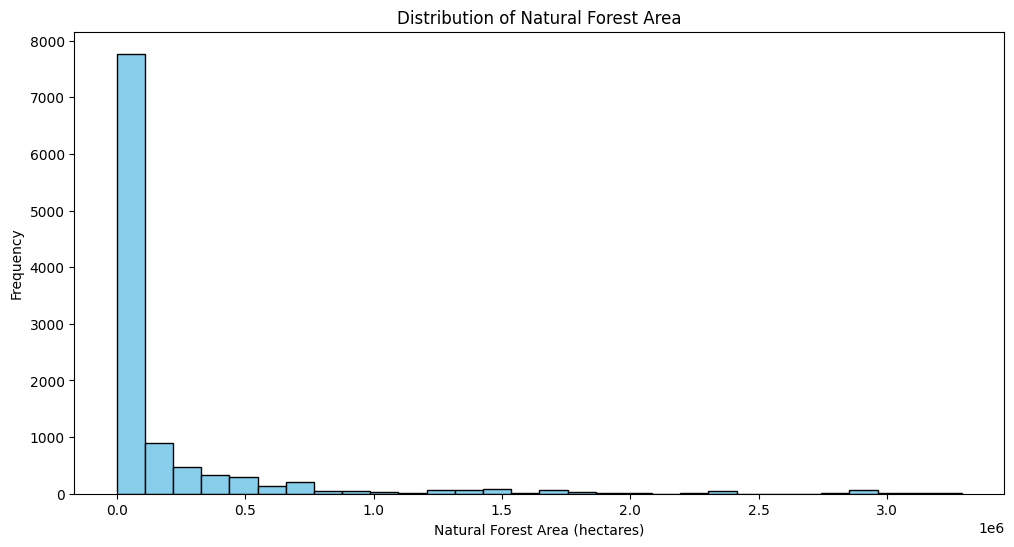

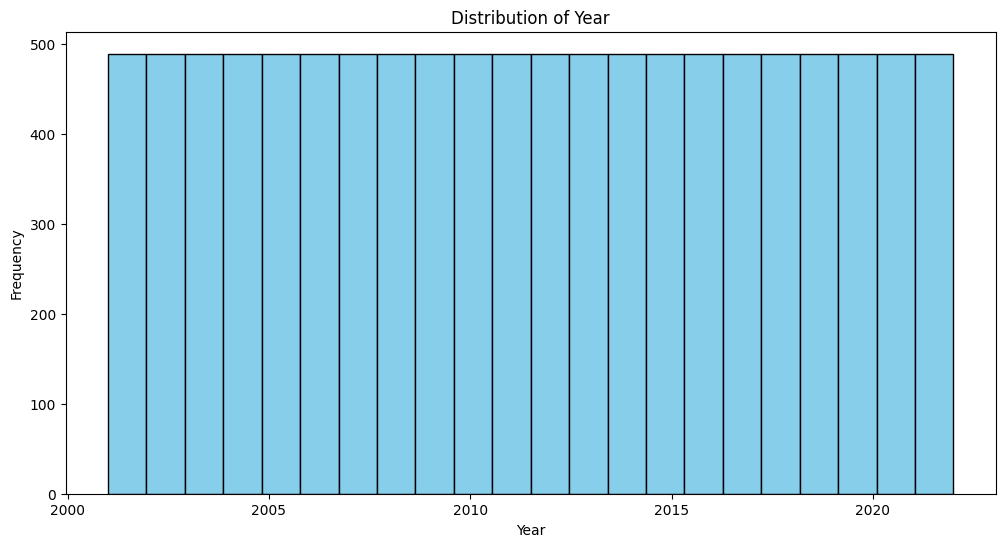

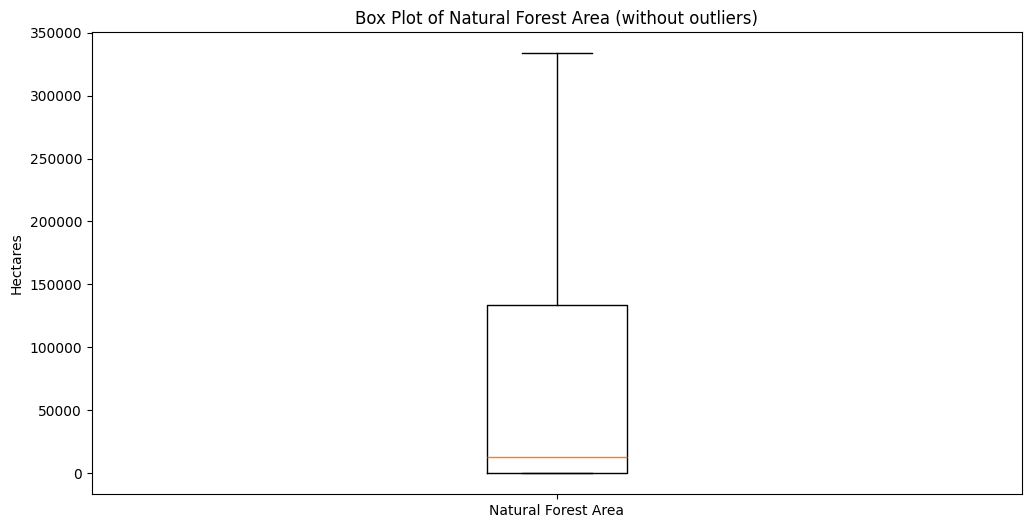

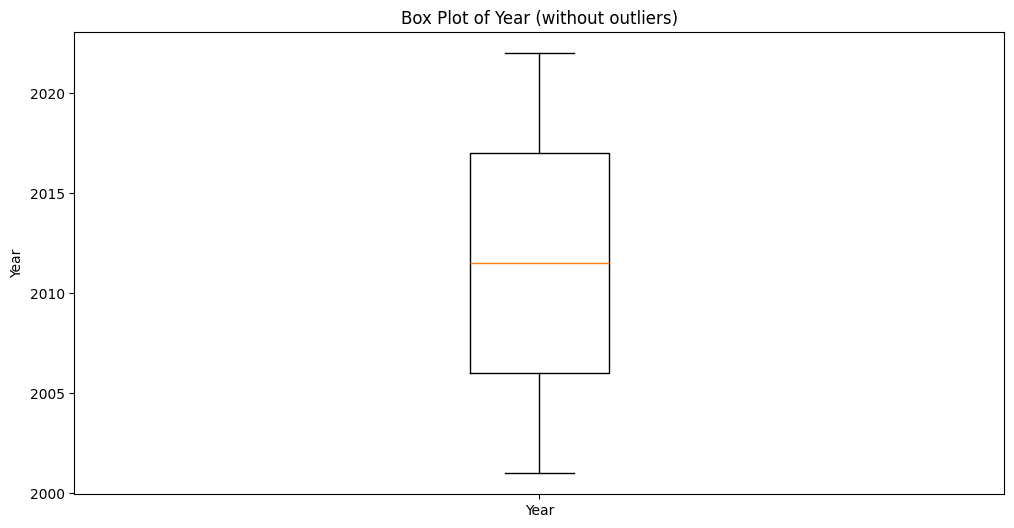

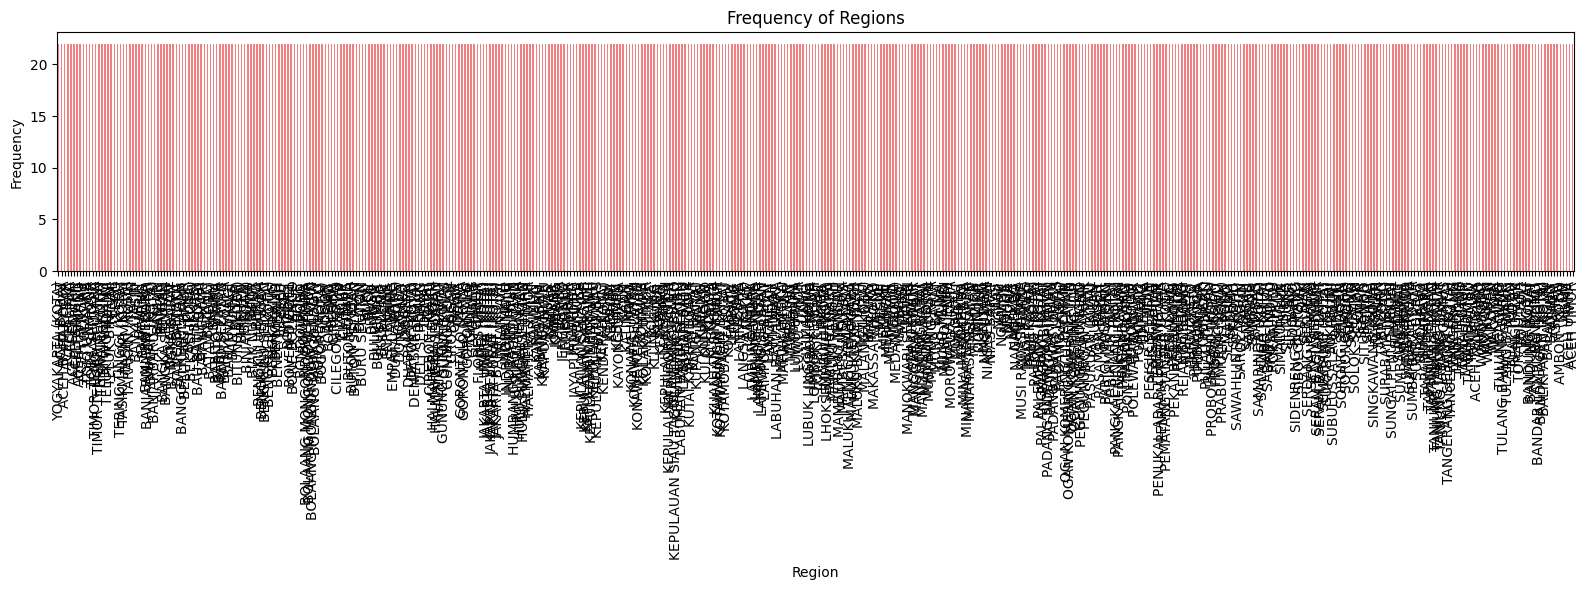

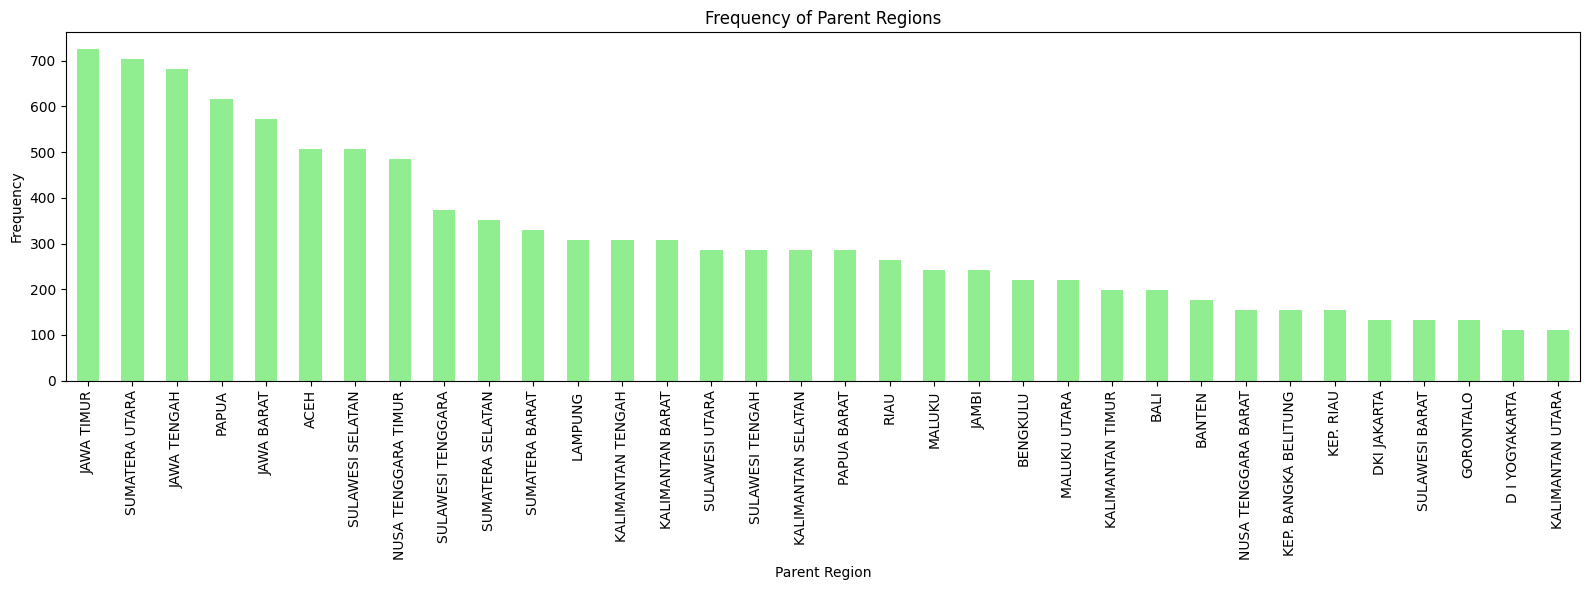

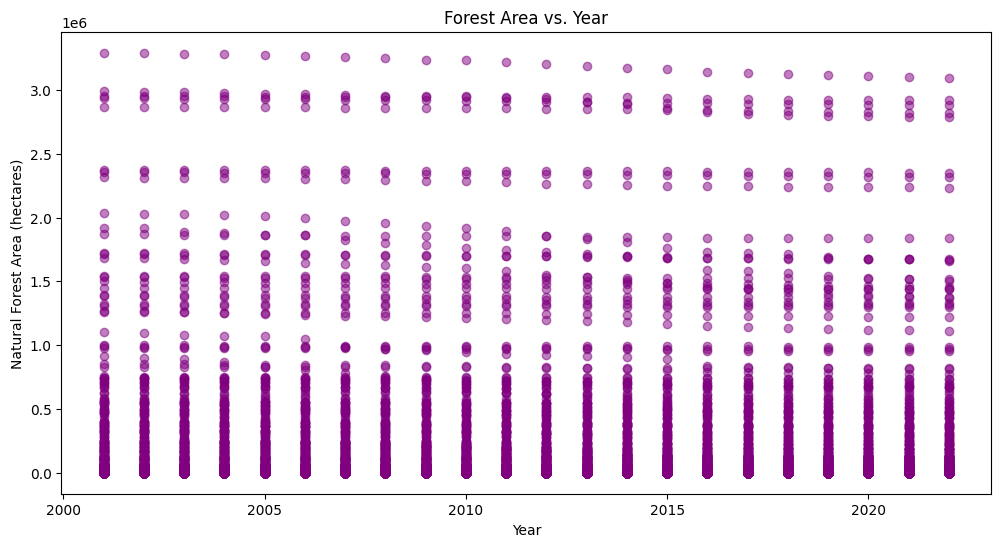

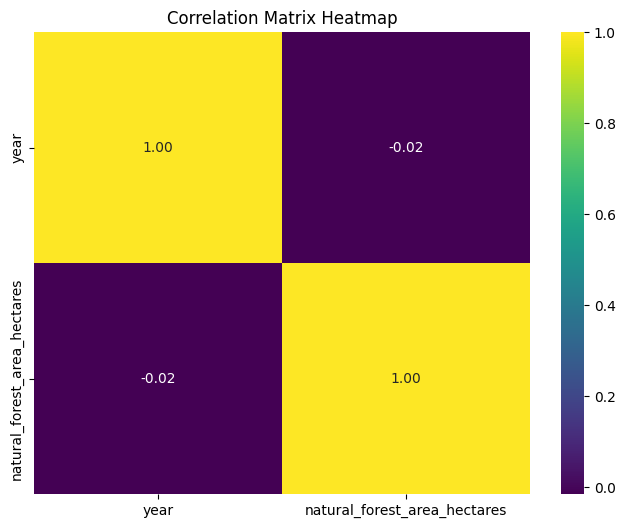

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(12, 6))
plt.hist(df['natural_forest_area_hectares'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Natural Forest Area (hectares)')
plt.ylabel('Frequency')
plt.title('Distribution of Natural Forest Area')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['year'], bins=len(df['year'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')
plt.show()


# Box Plots for Numerical Features
plt.figure(figsize=(12, 6))
plt.boxplot([df['natural_forest_area_hectares']], showfliers=False, tick_labels=['Natural Forest Area'])
plt.ylabel('Hectares')
plt.title('Box Plot of Natural Forest Area (without outliers)')
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([df['year']], showfliers=False, tick_labels=['Year'])
plt.ylabel('Year')
plt.title('Box Plot of Year (without outliers)')
plt.show()

# Bar Charts for Categorical Features
plt.figure(figsize=(16, 6))
df['region'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Regions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
df['parent_region'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Parent Region')
plt.ylabel('Frequency')
plt.title('Frequency of Parent Regions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Scatter Plots for Numerical Features
plt.figure(figsize=(12, 6))
plt.scatter(df['year'], df['natural_forest_area_hectares'], color='purple', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Natural Forest Area (hectares)')
plt.title('Forest Area vs. Year')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['year', 'natural_forest_area_hectares']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Summary:

### Q&A
There were no explicit questions in the task description. However, the overall goal was to explore the provided dataset to understand its characteristics and prepare for time series regression with LSTM and GRU models.  The exploration process successfully revealed key information about the data's structure and potential trends.

### Data Analysis Key Findings
* The dataset contains information on remaining forest area in Indonesian regencies over several years.
* The `natural_forest_area_hectares` column shows a wide range of values.  Visualizations like histograms and box plots were used to understand its distribution and potential outliers.
* The data includes categorical variables like 'region' and 'parent\_region', allowing for analysis of forest area variations across different geographical areas. Bar charts were used to visualize the frequencies of these regions.
* A weak negative correlation was observed between 'year' and 'natural\_forest\_area\_hectares' suggesting a possible decreasing trend in forest area over time. This was visualized with scatter plots.
* Visualizations like histograms, box plots, bar charts, and scatter plots were used to examine the data's distributions, relationships, and outliers.


### Insights or Next Steps
* Investigate the weak negative correlation between year and forest area further.  Explore potential contributing factors to this trend and consider adding more relevant features.
*  Explore the data for each region individually.  This could help identify unique trends and potentially improve the performance of time series models.
